### EXPLORATION OF POSSIBLE USE OF NEURAL NETWORKS IN ACNE DIAGNOSIS 
CLEMENT-ANDI CLEMENT EDET 
COMPUTATIONAL PHYSICS REPORT

### Abstract

Acne is a facial condition suffered usually by teenagers and young adults. Conventional methods of acne diagnosis involve booking an appointment with a doctor and undergoing examination. Examination may include checking family history, asking questions on ingestion habits and skin care products used. This is generally time consuming for both doctors and patients. The question this paper tries to answer the question “is it possible to cut out delays in the diagnosis process?” After all, a good model would save medical professionals a lot of time, especially when it comes to probing for relevant information from patients. This is because patients may not have adequate knowledge of information such as family history which could lead medical professionals down the wrong path. Also, patients may conceal their hidden habits and possibly the skin products they use. As such a model that relies as little as possible on subjective would be of massive help to all parties. 

### Introduction
This attempt at diversifying medical diagnosis methods seeks to propose and contribute to the growing field of machine learning and its applications in modern medicine. The model used is only a very small one with limited amounts of data, however, this should give a glimpse of the potential of neural networks in medical diagnosis.

### Tools
The software and libraries used for this project include: Jupyter Notebook, PIL, matplotlib, TensorFlow and keras. 

Jupyter notebook was chosen due to the ability to run various parts of code in isolation and perform adjustments until desired results were reached. This is all done without having to rerun all the code again. This was helpful with the fact that training models is not a computationally inexpensive task, especially using only a CPU. Jupyter notebook was also chosen because of the localization of all the data needed to analyze the data. The graphs persist which allows analysis on the data to be carried out over long periods. Also, JSON files were used as backups of data in case that data was lost for whatever reason. 

 

PIL – the Python Imaging Library allows for image processing capabilities with the Python Interpreter. It is also a very popular library with a lot of support. 

 

Matplotlib was chosen due to its data visualization prowess. 

TensorFlow is a powerful and flexible machine learning framework and keras is an API that aids building and training of neural networks with TensorFlow. 

In [1]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import keras
import json

2024-12-12 16:35:52.000618: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 16:35:52.025047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 16:35:52.025068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 16:35:52.025721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 16:35:52.029874: I tensorflow/core/platform/cpu_feature_guar

### Procedure

Setting up the neural network was of utmost importance. The placement of layers, variables, constants all play a crucial role in a well-functioning neural network. 

In the case of a convolutional neural network the following layers are the most common: 

Convolution: this is used for the activation of various features in an image. This is achieved by pushing an image through a set of convolution filters. A convolutional filter is a technique used in image processing to change the brightness of a pixel based on the brightness of the neighboring pixels. A matrix known as a kernel is used to extract the features from the image. 

The kernel is multiplied with the region of the image under itself, and the results are summed. This process is repeated for every location in the image. The result is a new image where each pixel is weighted sum of pixels in the original image. 

Rectified Linear Unit: this utilizes a function where negative values are mapped to zero whilst positive values are maintained. Thus, only the positive features are carried to the next layer. 

Pooling simply reduces the output of a layer, thus, reducing the number of parameters the network needs to learn.  A max pooling layer breaks the image into small blocks and looks for the pixel with the maximum value in the block. From here this value is used to create a new and compressed version of the initial image.  This layer makes models more resistant to small variations in input. 

 

Other layers used: 

Flatten: this converts multi-dimensional output from a previous layer into a one-dimensional array.  It connects the convolution and pooling layers which extract features with the fully connected layers which carry out classification and regression tasks. 

Dense: this is a fully connected layer that connects every neuron in a layer to every neuron in the previous layer. This is where regression tasks are carried out plus the eventual prediction by the model. 

There are two phases, however. Forward propagation and backpropagation. 

Forward propagation involves moving input data through hidden layers to an output layer. Each output receives input values multiplies them by its weights and add bias. It also applies an activation function and passes output to the next layer. In the case of the model developed. A ReLU function is used because it is computationally efficient compared to sigmoid and Tanh functions. It also accelerates the convergence of gradient descent towards the global minimum of the loss function. 

Gradient descent is a function used to minimize loss/error. 

Backpropagation is the process of adjusting weights to minimize error. It calculates loss – error between predicted and actual values. Computation of gradients with respect to each weight using chain rule. Update weights using gradient descent. The Adam optimizer was used due to its efficiency with large problems with lots of data and parameters. 

Dropout: This is a regularization technique that randomly drops out a certain percentage of neurons during training to prevent overfitting. Thus, neurons are forced to learn more robust features that aren’t dependent on a certain neuron. 

L2 regularization is a regression technique that helps prevent overfitting by adding a penalty term to the loss function. Thus, it adds a penalty term that is a sum of all the squared values of all the model weight multiplied by a regularization parameter. 

This was preferred over L1 because it does not force weight to be exactly zero. Instead pushes then to smaller values. This prevents a single feature from dominating the prediction. 

In [2]:
img_height = 640
img_width = 640
batch_size = 32

In [3]:
Sequential = keras.models.Sequential
layers = keras.layers

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.25),
    layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

2024-12-12 16:35:53.781933: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 640, 640, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 640, 640, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 320, 320, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 320, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 160, 160, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 160, 64)      1

The datasets were stored in directories which detailed what kind of images they were.
So the training data were put in the "train" directory and the valodation data were put in the "valid" directory.

Further in this directories there existed "acne" and "clean" directroies which allowed the model tag the images correctly.

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
  r'data-2/train',
  image_size=(img_height, img_width),
  batch_size=batch_size
  )
class_names = train_ds.class_names

val_ds = keras.preprocessing.image_dataset_from_directory(
  r'data-2/valid',
  image_size=(img_height, img_width),
  batch_size=batch_size
  )


Found 4229 files belonging to 2 classes.
Found 655 files belonging to 2 classes.


Here you can see the number of epochs used.

acc is the accuracy on the training set.
loss is the loss on the training set.

val_acc is the accuracy on the validation set.
val_loss is the loss on the validation set.

The data was also collected for graphical analysis.

Then the models structure and weights were solved.

In [6]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

model.save('checkpoint.h5')


Epoch 1/50
133/133 [==============================] - 133s 991ms/step - loss: 3.3902 - accuracy: 0.8567 - val_loss: 2.0451 - val_accuracy: 0.7038
Epoch 2/50
133/133 [==============================] - 137s 1s/step - loss: 1.5530 - accuracy: 0.8704 - val_loss: 1.7907 - val_accuracy: 0.7038
Epoch 3/50
133/133 [==============================] - 136s 1s/step - loss: 1.2112 - accuracy: 0.8770 - val_loss: 1.4126 - val_accuracy: 0.7038
Epoch 4/50
133/133 [==============================] - 137s 1s/step - loss: 0.9858 - accuracy: 0.9109 - val_loss: 1.1428 - val_accuracy: 0.7695
Epoch 5/50
133/133 [==============================] - 139s 1s/step - loss: 0.8403 - accuracy: 0.9295 - val_loss: 0.9589 - val_accuracy: 0.7969
Epoch 6/50
133/133 [==============================] - 137s 1s/step - loss: 0.7656 - accuracy: 0.9442 - val_loss: 1.0098 - val_accuracy: 0.8580
Epoch 7/50
133/133 [==============================] - 137s 1s/step - loss: 0.7269 - accuracy: 0.9371 - val_loss: 0.6443 - val_accuracy: 0.9

/home/andi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Result

To be a good fit, the training loss decreases to a point of stability. The validation loss decreases to a point of stability plus a small gap exists called the generalization gap. Also, the validation curve must be mostly above the training curve. 

The model created tends to this description. The loss is constantly reducing for both curves until they both flatten out close to each other. There is also a little generalization gap.  

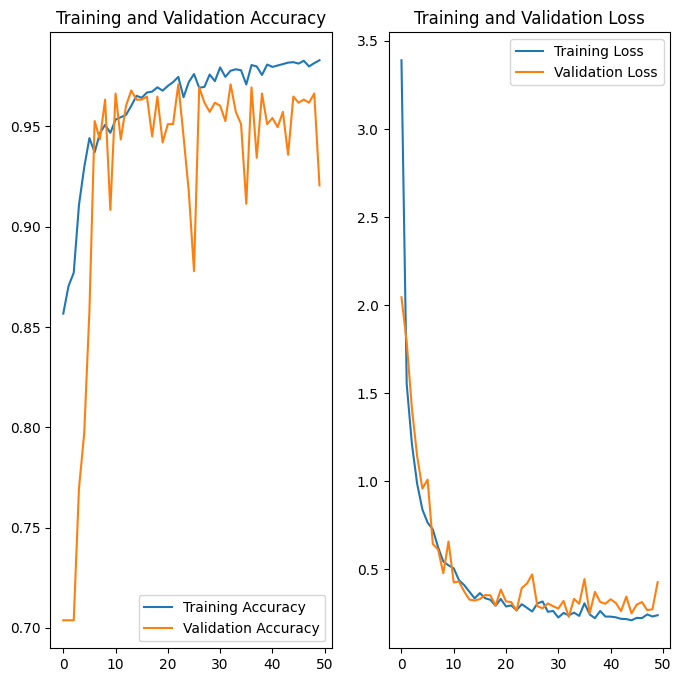

In [7]:
epochs_range = list(range(epochs))

with open("epochs_range.json", "w") as outfile:
    json.dump(epochs_range, outfile)

with open("acc.json", "w") as outfile:
    json.dump(acc, outfile)

with open("val_acc.json", "w") as outfile:
    json.dump(val_acc, outfile)

with open("loss.json", "w") as outfile:
    json.dump(loss, outfile)

with open("val_loss.json", "w") as outfile:
    json.dump(val_loss, outfile)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Below you can see the confusion matrix of the model on the validation and test sets.
The test set is a completely different set that was not used in training the model.

Found 655 files belonging to 2 classes.
1/1 [==============================] - 0s 30ms/step


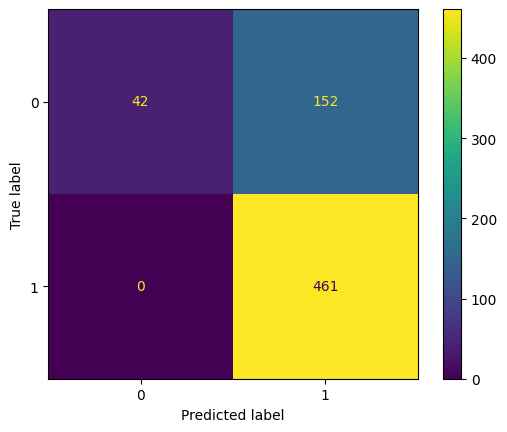

In [37]:
import keras
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import os

load_model = keras.models.load_model;
model = load_model('checkpoint.h5');

img_height = 640
img_width = 640

train_ds = keras.utils.image_dataset_from_directory(
  r'data-2/valid',
  image_size=(img_height, img_width),
  );
class_names = train_ds.class_names;

acne_paths = os.listdir('data-2/valid/acne')
clean_paths = os.listdir('data-2/valid/clean')
image_paths = acne_paths + clean_paths
actual = np.array([1 for _ in acne_paths] + [0 for _ in clean_paths])
predicted = []
acne_size = len(acne_paths)

for i, image_path in enumerate(image_paths):
    if i < acne_size:
        image_path = 'data-2/valid/acne/' + image_path
    else:
        image_path = 'data-2/valid/clean/' + image_path
    image  = keras.utils.load_img(image_path, target_size=(img_height, img_width));
    img_array = tf.keras.utils.img_to_array(image);
    img_array = tf.expand_dims(img_array, 0); # Create a batch
    predictions = model.predict(img_array);
    score = tf.nn.softmax(predictions[0]);

    if i < acne_size:
        if class_names[np.argmax(score)] == 'acne':
            predicted.append(1)
        else:
            predicted.append(0)
    else:
        if class_names[np.argmax(score)] == 'clean':
            predicted.append(1)
        else:
            predicted.append(0)

    
    # print(
        # "This image most likely belongs to {} with a {:.2f} percent confidence."
        # .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )

conf_mat = confusion_matrix(actual, np.array(predicted))
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


The confusion matrix gives us a way to interpret the results of the model.
Specifically, allow us to quantify the false positive, true positive, false negative and true negative predictions of the model.
In the context of this model these terms have to be explained.
1. False Positive: the model predicts an image as including acne but the image does not.
2. True Positive: the model predicts the image as including acne correctly.
3. False Negative: the model predicts the image as including no acne but the image has acne.
4. True Negative: the model predicts the image as including no acne correctly.

The true negative and false postive categories correspond to the blocks on the first row.
The false negative and true positive categories correspond to the blocks on the second row.

As can be seen the model does very well in correctly predicting images with acne.
However, it does not do as well in predicting images with no acne.
It also seems to have a bias towards the false positives which may allow us infer that the training set had a larger amount of images with acne than not.

The model recorded 94.30% accuracy on the test set.
The model however recorded 76.79% accuracy on the validation set.
After combining the results from both sets the accuracy of the model was 84.43%.

Once the results were gotten comparisons had to be made with those in the featured paper.
The featured paper had 6 classes: cyst, blackhead, normal skin, pustule, whitehead and nodule.
The model developed in that paper had 86.80% accuracy on average.

Thus, the model developed here is in comparison close to it in the classification task.
However, it must be noted that the models are very different in theirs tasks.
The model developed in this paper only classifies based on two labels whilst the other classifies for 6 labels.
Thus, it must be conceded that the featured paper's model might be a much better model.

### Discussion

With this project, we notice that convolutional neural networks are extremely useful in classification tasks. In this case the model was trained on a modest dataset and has been able to learn features of images with acne extremely well. The model was also able to work well with images completely out of the realm of what it was fed. 

To improve this model more data must be collected especially for images with no acne.

With all the results seen, the potential of neural networks in acne diagnosis is very high especially with advancements in GPU technology and potentially massive datasets. 

### References

Shen, X., Zhang, J., Yan, C. et al. An Automatic Diagnosis Method of Facial Acne Vulgaris Based on Convolutional Neural Network. Sci Rep 8, 5839 (2018). https://doi.org/10.1038/s41598-018-24204-6 